## Load data and describe the data

Import necessary libraries & packages

Load Data set

Check necessary details about data like shape, data types of variable, missing values etc


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import   ttest_1samp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [3]:
Data  = pd.read_csv('cold_storage.csv') # Import the dataset named 'Admission_predict.csv'
Data.head() 

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [4]:
Data.shape

(365, 4)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       365 non-null    object 
 1   Month        365 non-null    object 
 2   Date         365 non-null    int64  
 3   Temperature  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [7]:
Data.describe()

,Date,Temperature
count,365.000000,365.000000
mean,15.720548,3.002466
std,8.808321,0.465832
min,1.000000,1.700000
25%,8.000000,2.700000
50%,16.000000,3.000000
75%,23.000000,3.300000
max,31.000000,4.500000


# Check For Duplicates

In [8]:
dupes = Data.duplicated()
sum(dupes)

0

In [9]:
#no duplicates

# Check for missing values

In [10]:
Data.isnull().values.any()   # Any of the values in the dataframe is a missing value

False

In [11]:
Data.isnull().sum().sum()  # Total number of recognised missing values in the entire dataframe

0

In [12]:
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Season,0
Month,0
Date,0
Temperature,0


In [13]:
#no missing values

# Unique Values

In [14]:
unique=np.unique(Data.Temperature)
sorted(unique)

[1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5]

# Find the mean

Mean:  3.0024657534246546


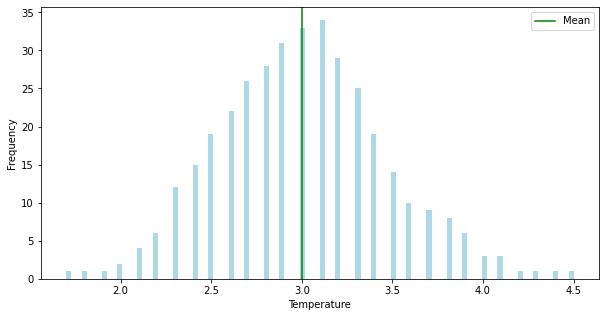

In [15]:
mean=Data['Temperature'].mean()
print('Mean: ',mean)
plt.figure(figsize=(10,5)) # set the figure size
plt.hist(Data['Temperature'],bins=100,color='lightblue') #Plot the histogram
plt.axvline(mean,color='green',label='Mean') 
plt.xlabel('Temperature')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

In [16]:
Data.groupby('Season').mean()

,Date,Temperature
Season,,
Rainy,15.754098,3.087705
Summer,15.525000,3.147500
Winter,15.878049,2.776423


In [17]:
print("Data:",Data.Temperature.mean())

Data: 3.0024657534246546


In [18]:
print(Data.Temperature.std())

0.4658319416510761


# Probability

In [19]:
z1=(2-3.0024657534246546)/0.4658319416510761

In [20]:
z1

-2.151990157376403

In [21]:
stats.norm.cdf(-2.151990157376403)

0.015699064791364483

In [22]:
z2=(4-3.0024657534246546)/0.4658319416510761

In [23]:
z2

2.141403706752536

In [24]:
1 - stats.norm.cdf(2.14)

0.01617738337216612

In [25]:
0.015699064791364483 + 0.01617738337216612

0.03187644816353061

# PART 2

In [26]:
data  = pd.read_csv('Cold_Storage_Mar2018_.csv') 
data.head() 

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8


In [27]:
data.shape

(35, 4)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         35 non-null     object 
 1   Month          35 non-null     object 
 2   Date           35 non-null     int64  
 3    Temperature   35 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [29]:
dupes = Data.duplicated()
sum(dupes)

0

In [30]:
data.columns=data.columns.str.strip()

In [31]:
data.describe()

,Date,Temperature
count,35.000000,35.000000
mean,14.400000,3.974286
std,7.389181,0.159674
min,1.000000,3.800000
25%,9.500000,3.900000
50%,14.000000,3.900000
75%,19.500000,4.100000
max,28.000000,4.600000


# Hypothesis Testing(T-Test)

Reason to choose T-test is,In one sample test, we compare the population parameter such as mean of a single sample of data collected from a single population.

In [32]:
#perform the test


In [33]:
print("The sample size for this problem is",len(data))

The sample size for this problem is 35


We do not know the population standard deviation and n = 35. So we use the t distribution and the tSTAT test statistic.

Null and Alternative hypothesis

Where temperature = 3.9 null hypothesis

where temperature != 3.9 alternative hypothesis

In [34]:
# one sample t-test

t_statistic, p_value = ttest_1samp(data.Temperature,3.9 )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: 2.752358609800241 p value: 0.009422395404264431 


In [35]:
# p_value < 0.01 => alternative hypothesis:

alpha_value = 0.01 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.01
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.009422395404264431


# Part II – Inferential Statistics

In [114]:
mydata  = pd.read_csv('Firm_Level_Data.csv') 
mydata.head() 

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [37]:
mydata.shape

(759, 10)

In [38]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [39]:
mydata.describe()

,Unnamed: 0,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,379.000000,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,219.248717,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.000000,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,189.500000,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,379.000000,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,568.500000,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160386,60.510000
max,758.000000,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


In [40]:
dupes = mydata.duplicated()
sum(dupes)

0

In [41]:
mydata.isnull().values.any() 

True

In [42]:
mydata.isnull().sum().sum()

21

In [43]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( mydata.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Unnamed: 0,0
sales,0
capital,0
patents,0
randd,0
employment,0
sp500,0
tobinq,21
value,0
institutions,0


In [44]:
pd.DataFrame({'value': mydata['tobinq'], 'Missing?': mydata['tobinq'].isnull()})

,value,Missing?
0,11.049511,False
1,0.844187,False
2,5.205257,False
3,0.305221,False
4,1.063300,False
...,...,...
754,0.697454,False
755,NaN,True
756,5.229723,False
757,1.625398,False


#  Univariate Analysis

<AxesSubplot:>

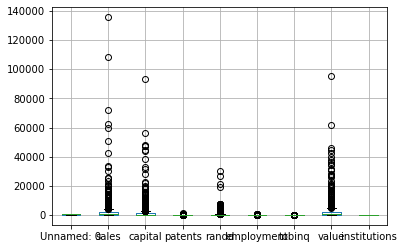

In [45]:
mydata.boxplot()

In [116]:
nums = []
cats = []
for i in mydata.columns:
    if mydata[i].dtype !='O':
        nums.append(i)
    else:
        cats.append(i)
print(nums)
print(cats)

['Unnamed: 0', 'sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']
['sp500']


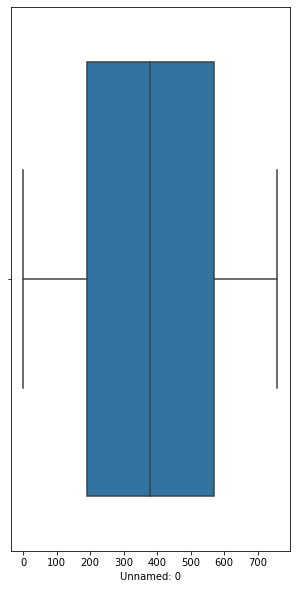

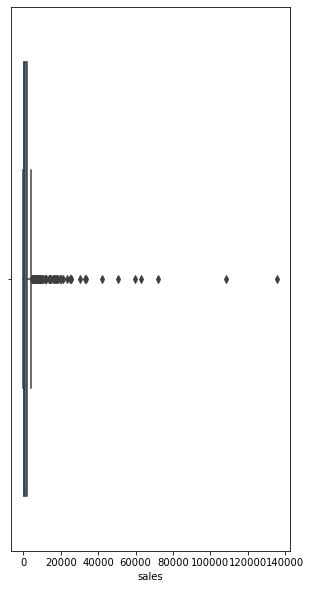

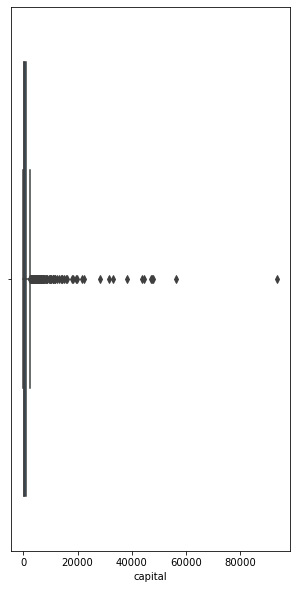

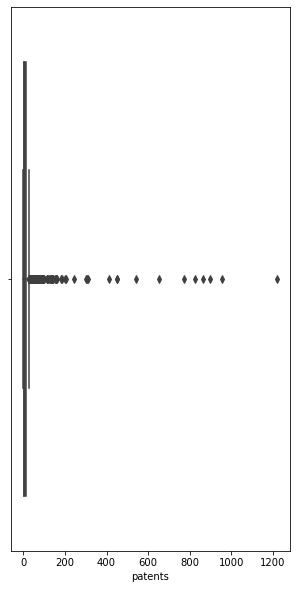

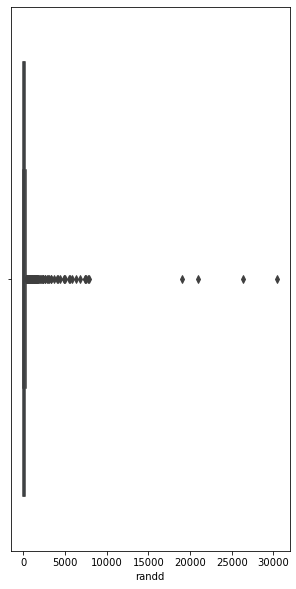

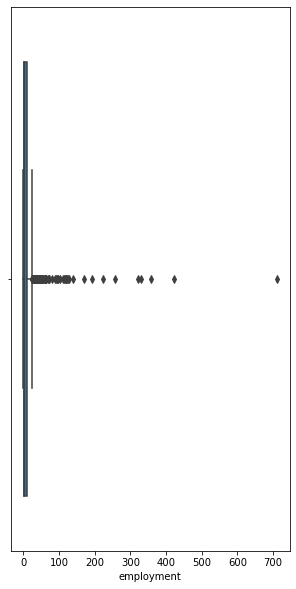

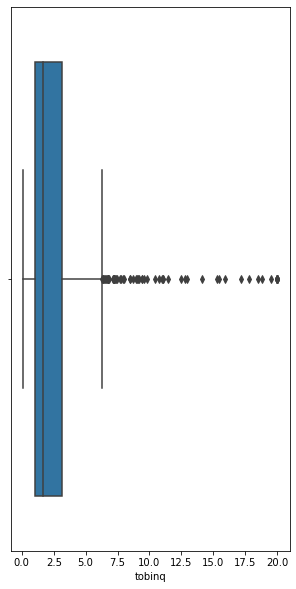

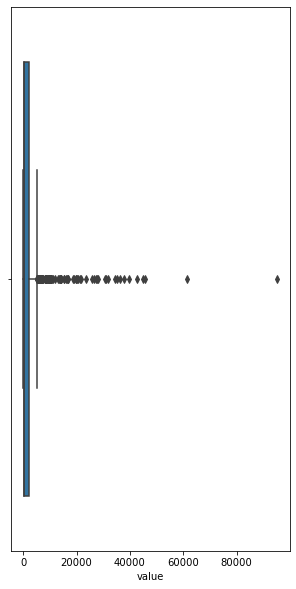

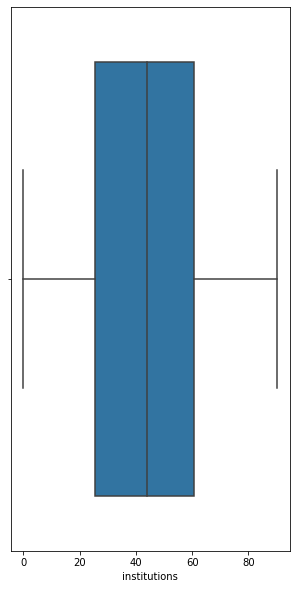

In [47]:
for x in nums:
    plt.figure(figsize=(5,10))
    sns.boxplot(mydata[x])
    plt.show()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'capital'}>],
       [<AxesSubplot:title={'center':'patents'}>,
        <AxesSubplot:title={'center':'randd'}>,
        <AxesSubplot:title={'center':'employment'}>],
       [<AxesSubplot:title={'center':'tobinq'}>,
        <AxesSubplot:title={'center':'value'}>,
        <AxesSubplot:title={'center':'institutions'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

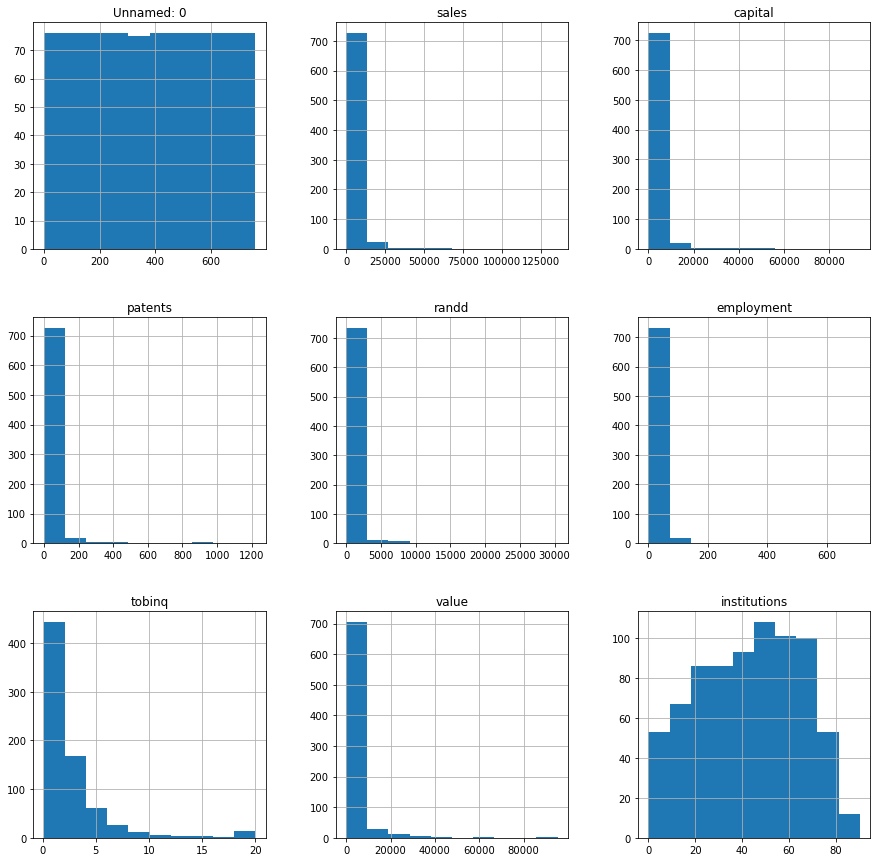

In [48]:
plt.figure()
mydata.hist(figsize=(15,15))

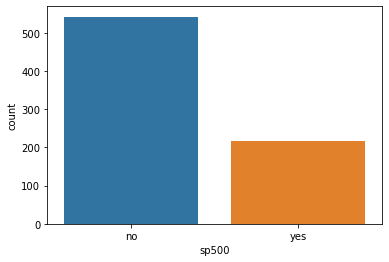

In [49]:
axw = sns.countplot(x='sp500', data=mydata)

# Bivariate analysis


 Bivariate Analysis usr Vs Unnamed: 0


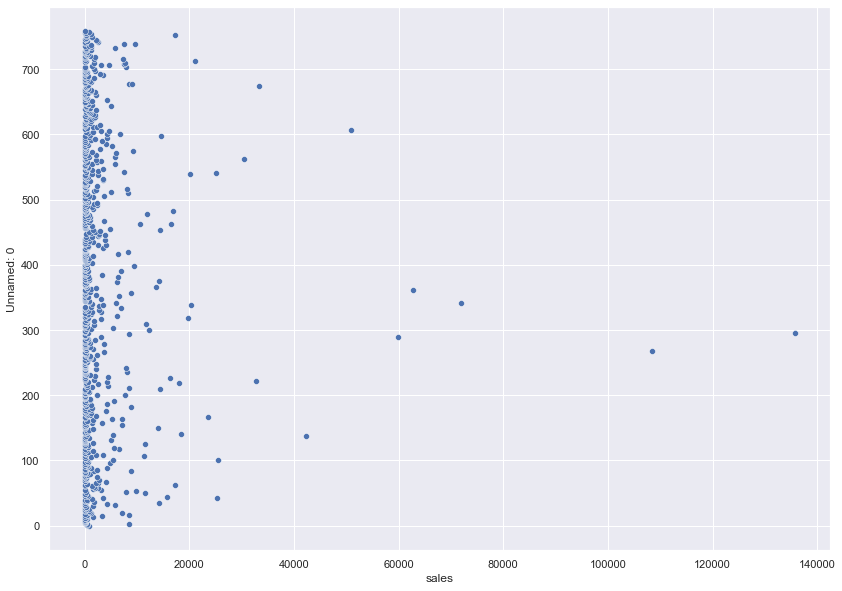

Maximum value of sales is  22.70199882 when  Unnamed: 0  has maximum value of 758

 Bivariate Analysis usr Vs sales


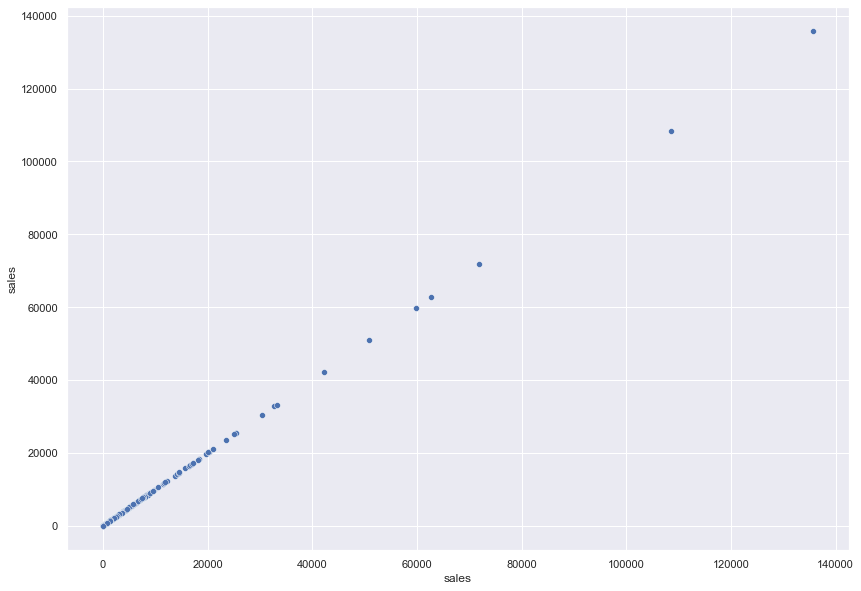

Maximum value of sales is  135696.7882 when  sales  has maximum value of 135696.7882

 Bivariate Analysis usr Vs capital


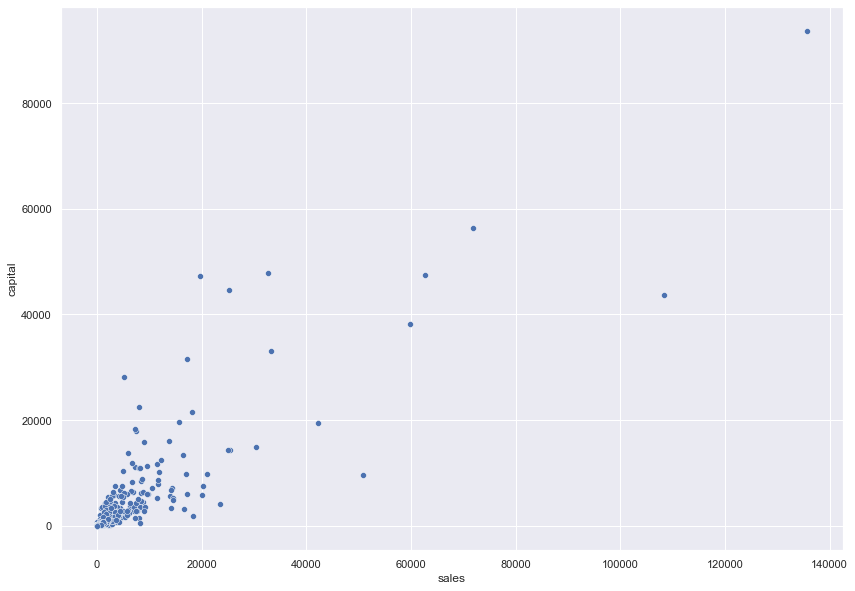

Maximum value of sales is  135696.7882 when  capital  has maximum value of 93625.20056

 Bivariate Analysis usr Vs patents


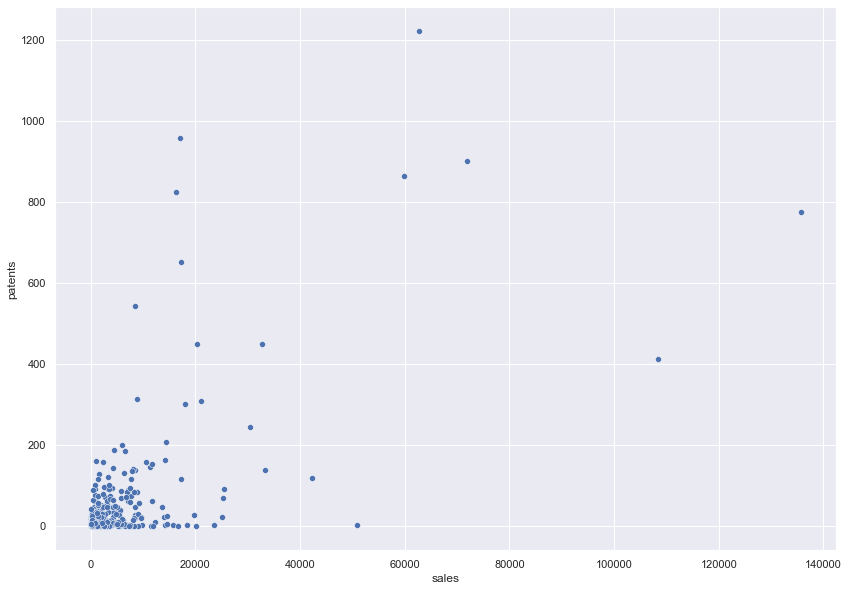

Maximum value of sales is  62715.97381 when  patents  has maximum value of 1220

 Bivariate Analysis usr Vs randd


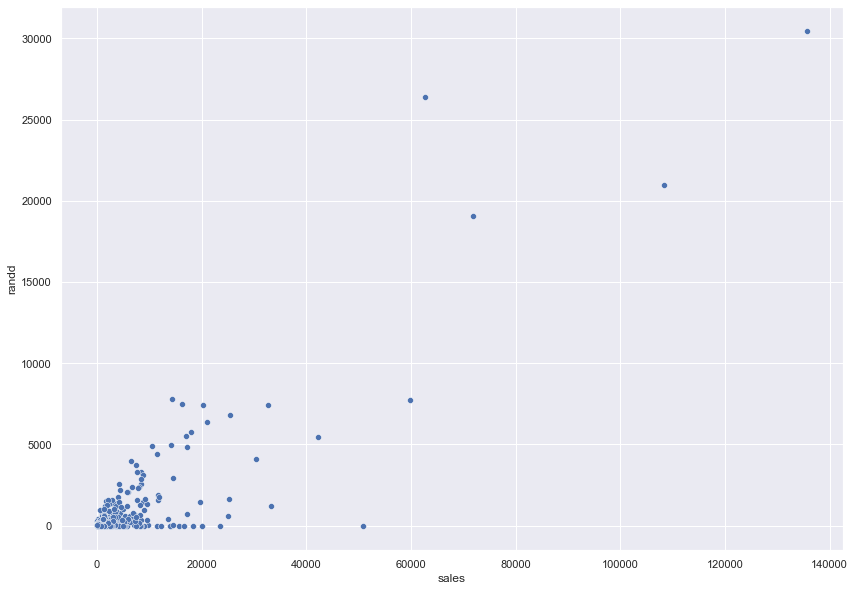

Maximum value of sales is  135696.7882 when  randd  has maximum value of 30425.25586

 Bivariate Analysis usr Vs employment


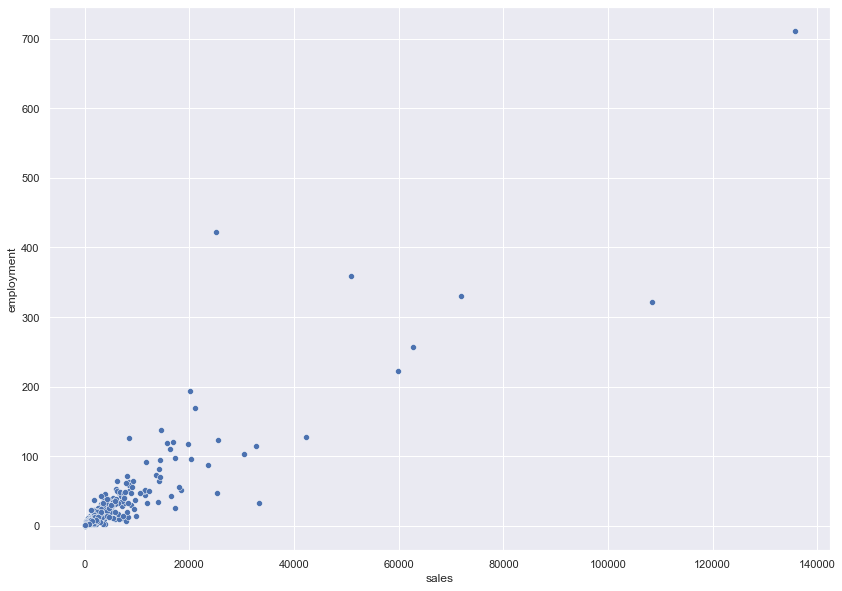

Maximum value of sales is  135696.7882 when  employment  has maximum value of 710.7999253

 Bivariate Analysis usr Vs sp500


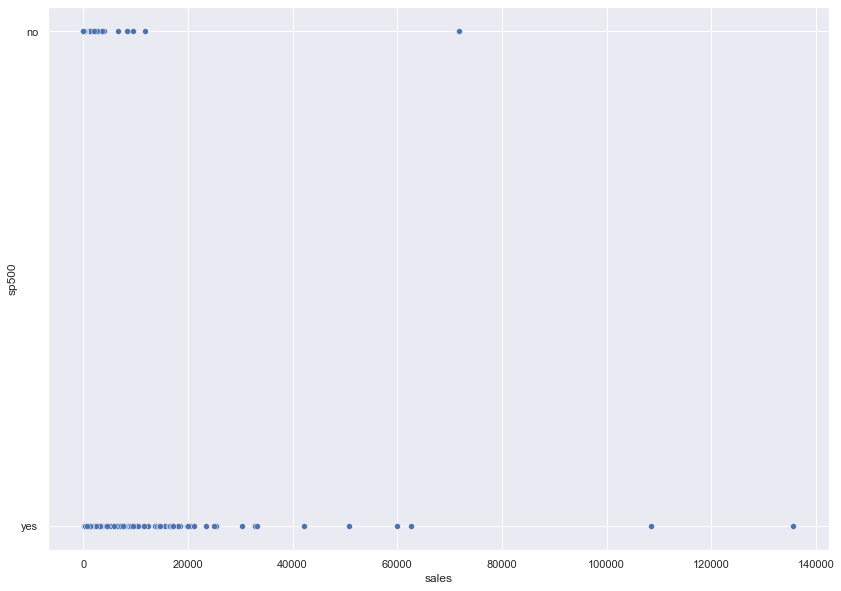

TypeError: reduction operation 'argmax' not allowed for this dtype

In [120]:
x=mydata["sales"]
for i in range(len(mydata.columns)):
    print("\033[1m\n Bivariate Analysis usr Vs", mydata.columns[i])
    plt.figure(figsize=(14,10))
    sns.scatterplot(x, mydata[mydata.columns[i]])
    plt.show()
    df1=mydata.loc[mydata[mydata.columns[i]].idxmax()]
    df1=df1["sales"]
    print("Maximum value of sales is ",df1,"when ",mydata.columns[i]," has maximum value of",np.max(mydata[mydata.columns[i]]))

<AxesSubplot:>

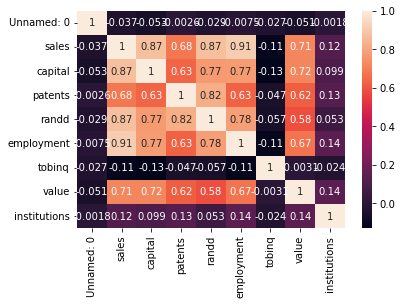

In [72]:
sns.heatmap(mydata.corr(), annot=True)

In [131]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_treatment=list(vif_data.loc[vif_data['VIF']>=4]['feature'])
print(vif_treatment)
  
vif_data.sort_values('VIF', ascending=False)
print(vif_data)

['capital', 'randd']
        feature       VIF
0       capital  4.119838
1       patents  3.885281
2         randd  6.229054
3    employment  3.888358
4        tobinq  1.566549
5         value  3.241414
6  institutions  2.447466
7     sp500_yes  2.220618


# Imputing Null Values

In [80]:
# Replacing NaN with a custom value
mydata['tobinq'].fillna(mydata.tobinq.median(), inplace = True)   

# Replace NaN values with the mean of the column
# Data['tobinq'].fillna(Data.tobinq.mean(), inplace = True)  

# Replace NaN values with the median of the column
# Data['tobinq'].fillna(Data.tobinq.median(), inplace = True)  
mydata

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...,...
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,1.680303,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


# SCALING

In [77]:
scaler = MinMaxScaler()
columns=['capital','patents','randd','employment','tobinq','value','institutions']
 
df_scaled = scaler.fit_transform(df[columns].to_numpy())
df_scaled = pd.DataFrame(df_scaled,columns=columns)
print("Scaled Dataset Using MinMaxScaler")
df_scaled['sp500']=mydata['sp500']
df_scaled.head().T

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4
capital,0.001725,0.001304,0.066447,0.00285,0.001496
patents,0.008197,0.001639,0.113115,0.00082,0.001639
randd,0.012558,0.0,0.108354,0.002746,0.000468
employment,0.003236,0.002608,0.069856,0.004312,0.002731
tobinq,0.549797,0.036476,0.255835,0.009367,0.047498
value,0.017055,0.002533,0.271703,0.000641,0.000687
institutions,0.890405,0.654687,0.529118,0.29817,0.548641
sp500,no,no,yes,no,no


# Encode

In [82]:
df = pd.get_dummies(mydata, prefix='sp500', columns=['sp500'])
df

,Unnamed: 0,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_no,sp500_yes
0,0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,1,0
1,1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,1,0
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,0,1
3,3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,1,0
4,4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,1,0
...,...,...,...,...,...,...,...,...,...,...,...
754,754,1253.900196,708.299935,32,412.936157,22.100002,0.697454,267.119487,33.50,0,1
755,755,171.821025,73.666008,1,0.037735,1.684000,1.680303,228.475701,46.41,1,0
756,756,202.726967,123.926991,13,74.861099,1.460000,5.229723,580.430741,42.25,1,0
757,757,785.687944,138.780992,6,0.621750,2.900000,1.625398,309.938651,61.39,0,1


In [83]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [84]:
df.drop('sp500_no', axis=1, inplace = True)

In [132]:
df.drop('capital', axis=1, inplace = True)

In [133]:
df.drop('randd', axis=1, inplace = True)

# Split the Data

In [134]:
X = df.drop('sales', axis=1)
y = df[['sales']]

In [135]:
X.head()

,patents,employment,tobinq,value,institutions
0,10,2.306000,11.049511,1625.453755,80.27
1,2,1.860000,0.844187,243.117082,59.02
2,138,49.659005,5.205257,25865.233800,47.70
3,1,3.071000,0.305221,63.024630,26.88
4,2,1.947000,1.063300,67.406408,49.46


In [136]:
y.head()

,sales
0,826.995050
1,407.753973
2,8407.845588
3,451.000010
4,174.927981


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(531, 5) (531, 1)
(228, 5) (228, 1)


In [138]:
X.columns

Index(['patents', 'employment', 'tobinq', 'value', 'institutions'], dtype='object')

# Linear Regressioin model

In [139]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [140]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for patents is 15.276584322633443
The coefficient for employment is 145.58806378577813
The coefficient for tobinq is -79.50630905099676
The coefficient for value is 0.17790393743248134
The coefficient for institutions is -10.543794183092317


In [141]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 493.2435872677197


In [142]:
# R square on training data
model1=regression_model.score(X_train, y_train)
model1

0.8521158031628298

In [144]:
#R square on testing data
model2=regression_model.score(X_test, y_test)
model2

0.8797374510772246

In [145]:
#RMSE on training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(mean_squared_error(y_train,predicted_train))

3630.142501033774

In [146]:
##RMSE on testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test,predicted_test))

2334.55672683095

In [147]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,patents,employment,tobinq,value,institutions,sales
461,3,0.958000,1.680303,156.287797,35.63,123.586022
155,60,28.000002,2.314482,9924.944095,60.55,7141.303137
75,18,13.954001,0.641053,957.875643,63.65,2440.900386
373,0,1.324000,1.530988,59.281898,28.28,123.034020
633,1,9.060000,0.252283,143.794297,30.25,1042.014058


# Statsmodel

In [148]:
data_train.columns

Index(['patents', 'employment', 'tobinq', 'value', 'institutions', 'sales'], dtype='object')

In [154]:
expr= 'sales ~ patents+employment+tobinq+value+institutions'

In [155]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       493.243587
patents          15.276584
employment      145.588064
tobinq          -79.506309
value             0.177904
institutions    -10.543794
dtype: float64

In [156]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     605.0
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.23e-215
Time:                        16:31:53   Log-Likelihood:                -5106.1
No. Observations:                 531   AIC:                         1.022e+04
Df Residuals:                     525   BIC:                         1.025e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      493.2436    380.909      1.295   

In [157]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('sales',axis=1))-data_train['sales'])**2)
mse

13177934.577811722

In [158]:
#Root Mean Squared Error - RMSE
rmse=np.sqrt(mse)
rmse

3630.142501033771

In [167]:
np.sqrt(lm1.mse_resid)

3650.82724110787

In [162]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

In [163]:
y_pred = regression_model.predict(X_test)

# Best fit line

Text(0, 0.5, 'Predicted')

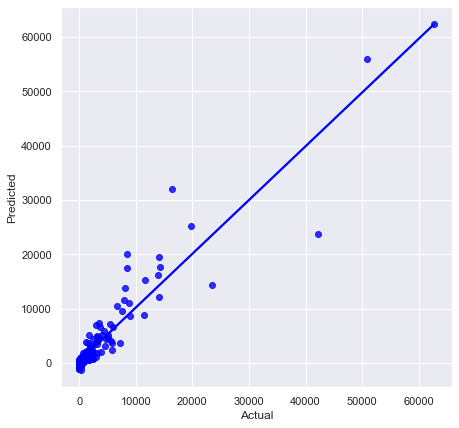

In [169]:
sns.set(rc = {'figure.figsize':(7,7)})
ax=sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')